In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
#Take this file from Harsha, cant upload to git, too heavy..

df_final=pd.read_csv("final_df.csv")

#df_final.info()

not_needed_cols = ['Unnamed: 0.1' , 'Unnamed: 0']

df_final = df_final.drop(not_needed_cols , axis = 1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693824 entries, 0 to 2693823
Data columns (total 15 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Time                                       object 
 1   Engine Coolant Temperature [°C]            float64
 2   Intake Manifold Absolute Pressure [kPa]    float64
 3   Engine RPM [RPM]                           float64
 4   Vehicle Speed Sensor [km/h]                float64
 5   Intake Air Temperature [°C]                float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 7   Absolute Throttle Position [%]             float64
 8   Ambient Air Temperature [°C]               float64
 9   Accelerator Pedal Position D [%]           float64
 10  Accelerator Pedal Position E [%]           float64
 11  label                                      object 
 12  Engine Coolant Temperature [Â°C]           float64
 13  Intake Air Temperature [Â°C]              

In [3]:
#Columns Pre-Processing


def preprocess(df):

    print(df.columns)
    print("Removing special charctors..")
    df.columns = df_final.columns.str.replace('°', '_degrees') \
                       .str.replace('Â', 'A') \
                       .str.replace('[' , '') \
                       .str.replace(']' , '') \
                       .str.replace(" " , "_") \
                       .str.replace("%" ,"") \
                       .str.replace("/" , "_") \
                       .str.replace("__" , "_")
    
    print(df.columns)

    print("Done..")

    print(df.info())

    return df



df_final = preprocess(df_final)

Index(['Time', 'Engine Coolant Temperature [°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'label', 'Engine Coolant Temperature [Â°C]',
       'Intake Air Temperature [Â°C]', 'Ambient Air Temperature [Â°C]'],
      dtype='object')
Removing special charctors..
Index(['Time', 'Engine_Coolant_Temperature_degreesC',
       'Intake_Manifold_Absolute_Pressure_kPa', 'Engine_RPM_RPM',
       'Vehicle_Speed_Sensor_km_h', 'Intake_Air_Temperature_degreesC',
       'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s',
       'Absolute_Throttle_Position_', 'Ambient_Air_Temperature_degreesC',
       'Accelerator_Pedal_Position_D_', 'Accelerator_Pedal_Position_E_',
       'label', 'Engine_Coolant_Temperature

In [4]:
#df_final.label.unique()

In [5]:
#Groups

cl_bad = ['KA_BB' , "KA_RT" , "S_KA"]

cl_1 = ["KA_KA" , "S_S"]
cl_2 = ["RT_S" , "BB_RT"]
cl_3 = ["RT_RT" , "S_CW"]

#Taken care of each grouping
assert sorted(cl_bad + cl_1 + cl_2 + cl_3) == sorted(list(df_final.label.unique()))


In [6]:
# Changing label to desired group/fleet labels

labels = []
for i in df_final.label:
    if i in cl_bad:
        labels.append("fleet1") #Bad Cluster
    if i in cl_1:
        labels.append("fleet2")
    if i in cl_2:
        labels.append("fleet3")
    if i in cl_3:
        labels.append("fleet4")

df_final['label'] = labels

df_final.label.value_counts()

label
fleet3    1286377
fleet1    1096741
fleet2     253527
fleet4      57179
Name: count, dtype: int64

Text(0.5, 1.0, 'Boxplot of Air_Flow_Rate_from_Mass_Flow_Sensor_g_s with label')

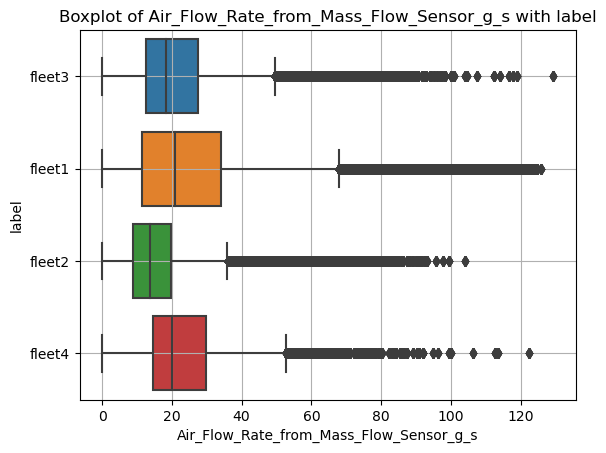

In [7]:
sns.boxplot(df_final , x = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s' , y='label')
plt.grid(True)
plt.title("Boxplot of Air_Flow_Rate_from_Mass_Flow_Sensor_g_s with label")

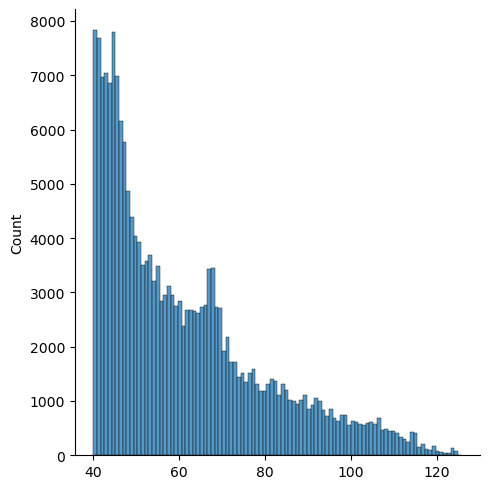

In [8]:
condn = (df_final['label'] == 'fleet1') & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] >= 40)

sns.displot(list(df_final[condn]['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s']))

In [9]:
#Change for the group specific

def change_group(df ,condition , grp):
    df1 = df[condition]
    df2 = df[df['label'] != grp]

    return pd.concat([df1 , df2] , axis = 0)

cnd_fleet1 = (df_final['label'] == 'fleet1') & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] >= 50)
cnd_fleet2 = (df_final['label'] == 'fleet2') & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] > 5) & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] <=40)
cnd_fleet3 = (df_final['label'] == 'fleet3') & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] > 5) & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] <=50)
cnd_fleet4 = (df_final['label'] == 'fleet4') & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] > 5) & (df_final['Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'] <=60)


df_final = change_group(df_final , cnd_fleet1 , 'fleet1')
df_final = change_group(df_final , cnd_fleet2 , 'fleet2')
df_final = change_group(df_final , cnd_fleet3 , 'fleet3')
df_final = change_group(df_final , cnd_fleet4 , 'fleet4')

df_final['label'].value_counts()

label
fleet3    1217200
fleet2     222508
fleet1     122032
fleet4      54640
Name: count, dtype: int64

Text(0.5, 1.0, 'Boxplot of Air_Flow_Rate_from_Mass_Flow_Sensor_g_s with label')

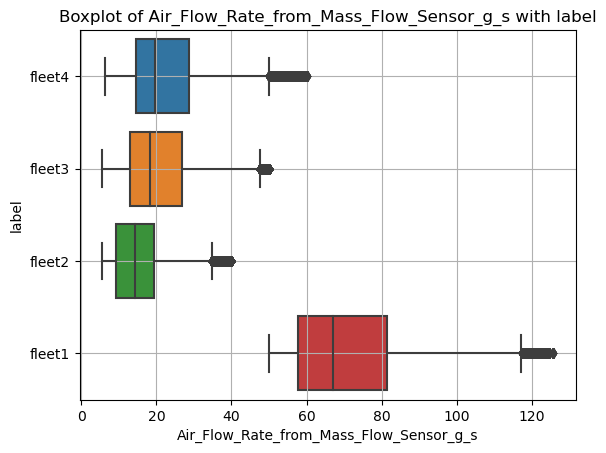

In [10]:
sns.boxplot(df_final , x = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s' , y='label')
plt.grid(True)
plt.title("Boxplot of Air_Flow_Rate_from_Mass_Flow_Sensor_g_s with label")

In [11]:
df_final.to_csv("final_df_preprocessed.csv")

In [ ]:
// Condition for fleet1
if (label of vehicle is 'fleet1') and (Air Flow Rate from Mass Flow Sensor in g/s is greater than or equal to 50) then
    cnd_fleet1 is true
else
    cnd_fleet1 is false
end if

// Condition for fleet2
if (label of vehicle is 'fleet2') and (Air Flow Rate from Mass Flow Sensor in g/s is greater than 5) and (Air Flow Rate from Mass Flow Sensor in g/s is less than or equal to 40) then
    cnd_fleet2 is true
else
    cnd_fleet2 is false
end if

// Condition for fleet3
if (label of vehicle is 'fleet3') and (Air Flow Rate from Mass Flow Sensor in g/s is greater than 5) and (Air Flow Rate from Mass Flow Sensor in g/s is less than or equal to 50) then
    cnd_fleet3 is true
else
    cnd_fleet3 is false
end if

// Condition for fleet4
if (label of vehicle is 'fleet4') and (Air Flow Rate from Mass Flow Sensor in g/s is greater than 5) and (Air Flow Rate from Mass Flow Sensor in g/s is less than or equal to 60) then
    cnd_fleet4 is true
else
    cnd_fleet4 is false
end if